In [25]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import *
from sklearn.tree import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.metrics import *
import time
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
import seaborn as sns
import sklearn.metrics as metrics

In [26]:
df=pd.read_csv('Static_dataset.csv')

In [27]:
df.head()


,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [28]:
df.shape

(268074, 16)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [30]:
#Will display maximum columns
pd.set_option("display.max.columns", None)

In [31]:
#Will display the maximum rows
pd.set_option("display.max.rows", None)

In [32]:
#Checking for any null rows in the dataset
df.isnull().any()

timestamp           False
FQDN_count          False
subdomain_length    False
upper               False
lower               False
numeric             False
entropy             False
special             False
labels              False
labels_max          False
labels_average      False
longest_word         True
sld                 False
len                 False
subdomain           False
Target Attack       False
dtype: bool

Here we have noticed that 4 columns have data as objects and rest are int or float. So we have to process these seperately.

Firstly we can drop the time_stamp column as it is the time_stamp value where the dns packet was sent to the server. We have to process the data inside the query so time_stamp is irrelevant.



In [33]:
# Dropping Timestamp
df.drop(['timestamp'], axis=1,inplace=True)

In [34]:
#Caluculating value counts 
df['longest_word'].value_counts()

2                   109981
4                    70188
N                     4498
C                     2969
9                     1906
local                 1707
L                     1429
A                      409
online                 384
s                      358
microsoft              271
news                   256
tap                    212
shop                   204
bank                   186
e                      180
xn                     176
n                      167
t                      157
a                      155
sports                 146
world                  146
money                  129
i                      125
blog                   123
global                 122
film                   121
digital                113
sport                  112
city                   112
media                  111
tv                     109
r                      108
net                    108
express                107
portal                  99
dns                     99
g

In [35]:
df['longest_word'].isnull().sum()

8

In [19]:
print("Number of 1s in target",df['Target Attack'].value_counts()[1])
print("Number of 0s in target",df['Target Attack'].value_counts()[0])

Number of 1s in target 147179
Number of 0s in target 120887


In [13]:
#Dropping the missing values
df.dropna(inplace=True)

In [20]:
#Checking Null values again
df['longest_word'].isnull().sum()

0

In [21]:
#Checking again the rows dropped 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268066 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268066 non-null  object 
 1   FQDN_count        268066 non-null  int64  
 2   subdomain_length  268066 non-null  int64  
 3   upper             268066 non-null  int64  
 4   lower             268066 non-null  int64  
 5   numeric           268066 non-null  int64  
 6   entropy           268066 non-null  float64
 7   special           268066 non-null  int64  
 8   labels            268066 non-null  int64  
 9   labels_max        268066 non-null  int64  
 10  labels_average    268066 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268066 non-null  object 
 13  len               268066 non-null  int64  
 14  subdomain         268066 non-null  int64  
 15  Target Attack     268066 non-null  int64  
dtypes: float64(2), int64

In [23]:
df.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [36]:
# Modifying Longest word 
df['longest_word'] = df['longest_word'].map(lambda x : int(x) if str(x).isdigit() else int(len(str(x))))

Longest Word Column with basic understanding seems to include the length of the longest

In [37]:
df.head()


,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,5,local,15,1,1


In [38]:
df['sld'].value_counts()

192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
local                                 1703
FHEPFCELEHFCEPFFFACACACACACACABL      1429
DC                                    1008
172                                    424
EJFDEBFEEBFACACACACACACACACACAAA       288
microsoft                              271
isatap                                 192
FHFAEBEECACACACACACACACACACACAAA       114
dns                                     95
wpad                                    76
adidas                                  60
google                                  58
blogspot                                48
windowsupdate                           44
city                                    40
fujifilm                                39
wordpress                               36
amu                                     32
poitan     

Here we implement Label encoding on SLD as all the values are strings here and then if two DNS queries share the same sublevel domain name then they belong to the same category of domains approximately

In [39]:
SLD_data = pd.DataFrame(df, columns=['sld'])

In [40]:
SLD_data.head()

,sld
0,192
1,192
2,192
3,192
4,local


In [41]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder
for SLD_data in SLD_data:
    LableEncoding = LabelEncoder()
    df[SLD_data] = LableEncoding.fit_transform(df[SLD_data])

In [42]:
from pickle import dump
dump(LableEncoding, open('label_encoder.pkl', 'wb'))

In [43]:
df['sld'].value_counts()

35       109517
57        70188
166        4498
160        1961
60         1906
5622       1703
165        1429
159        1008
32          424
164         288
6065        271
4643        192
168         114
2417         95
10768        76
264          60
3773         58
1217         48
10689        44
1734         40
3436         39
10728        36
542          32
7557         32
8558         30
6508         28
4799         28
4259         27
3799         27
3686         26
11030        26
9445         26
5349         24
8174         24
4744         24
361          24
852          24
9389         24
8547         24
9969         24
8411         23
7051         22
6490         22
9896         22
423          22
798          21
4639         20
10121        20
3702         20
6198         20
6702         20
3471         20
946          20
8297         20
2790         20
6946         20
2290         19
8891         19
1275         19
6197         18
4310         18
6039         18
3709    

In [44]:
df.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5622,15,1,1


In [45]:
df.shape

(268074, 15)

Index(['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
       'entropy', 'special', 'labels', 'labels_max', 'labels_average',
       'longest_word', 'sld', 'len', 'subdomain'],
      dtype='object')

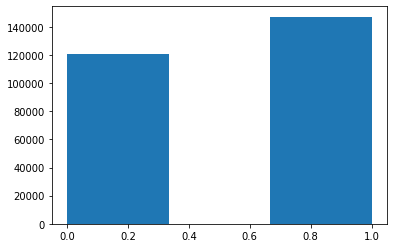

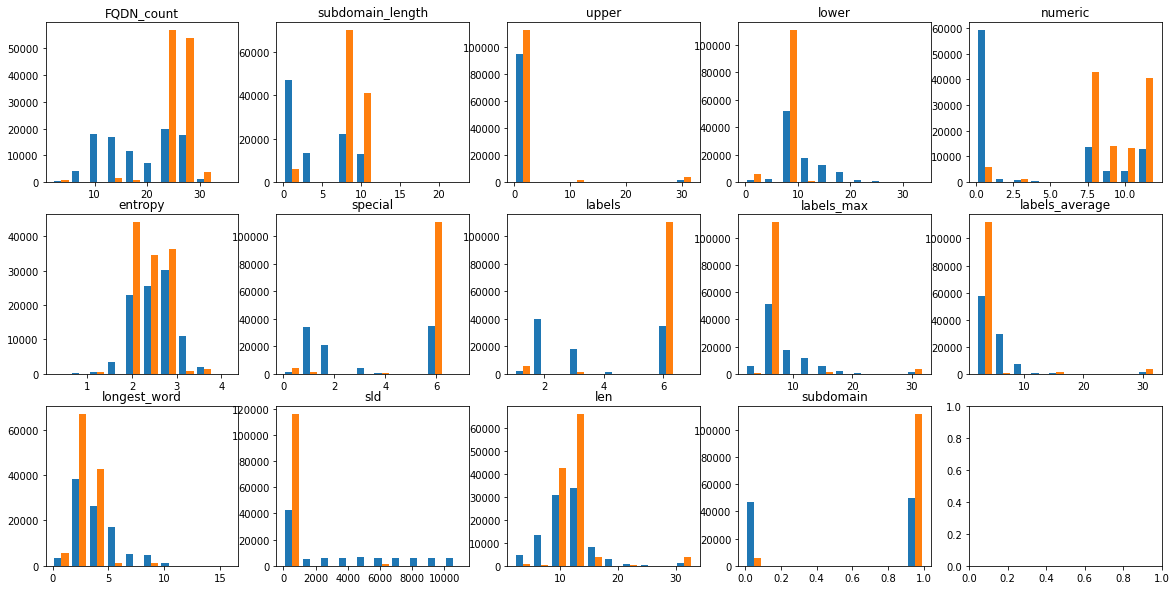

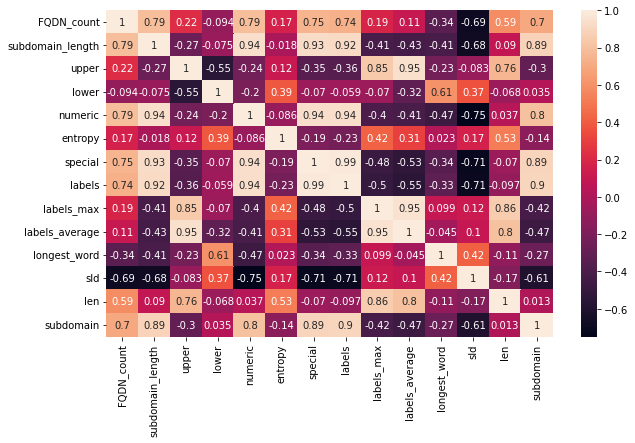

In [46]:
X = df.drop(["Target Attack"], axis = 1)
Y = df["Target Attack"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=43)

class1 = X_train[Y==0]
class2 = X_train[Y==1]
plt.hist(Y, bins = 3)

fig, axl = plt.subplots(3,5, figsize = (20,10))
for a,col in zip(axl.flatten(),class1.columns):
    a.hist([class1[col], class2[col]], alpha=1, label=['0','1'])
    a.set_title(col)


n_df = X_train
corr = n_df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True)

mat = abs(corr)
mat[mat>0.95]

v_threshold = VarianceThreshold(threshold=  0)
v_threshold.fit(X_train)
X_train.columns[v_threshold.get_support()]

In [47]:
X= df.iloc[:,:14]
X.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5622,15,1


In [48]:
y=df.iloc[:,14:15]
y.head()

,Target Attack
0,1
1,1
2,0
3,1
4,1


In [49]:
from sklearn.preprocessing import StandardScaler
#Scaling
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.2,random_state=0)

# Scale X
scaler = MinMaxScaler()

train_X = pd.DataFrame(scaler.fit_transform(train_X),train_X.index,train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X),test_X.index,test_X.columns)

In [ ]:
Features_2=['labels','labels_average','labels_max','len','numeric','special','subdomain','subdomain_length']
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
model_4=rfc.fit(X_train,y_train)
rfc_predict=model_4.predict(X_test)
print("Accuracy: ",accuracy_score(rfc_predict,y_test))
print("Precision: ",precision_score(y_test, rfc_predict))
print("Recall: ",recall_score(y_test, rfc_predict))
plot_confmat(y_test, rfc_predict)

dump(model_4, open('rf_model_f2.pkl', 'wb'))

## Feature Selection Mutual Info


In [200]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(train_X, train_Y)

print(mutual_info)

mutual_info = pd.Series(mutual_info)
mutual_info.index = train_X.columns
mutual_info.sort_values(ascending=False)


[0.25795234 0.22337563 0.00434446 0.23881763 0.21731736 0.26562427
 0.27578874 0.28003814 0.22534259 0.2427271  0.15046083 0.29047294
 0.15799349 0.1534541 ]


sld                 0.290473
labels              0.280038
special             0.275789
entropy             0.265624
FQDN_count          0.257952
labels_average      0.242727
lower               0.238818
labels_max          0.225343
subdomain_length    0.223376
numeric             0.217317
len                 0.157993
subdomain           0.153454
longest_word        0.150461
upper               0.004344
dtype: float64

Now we will order the features according to mutual information between them

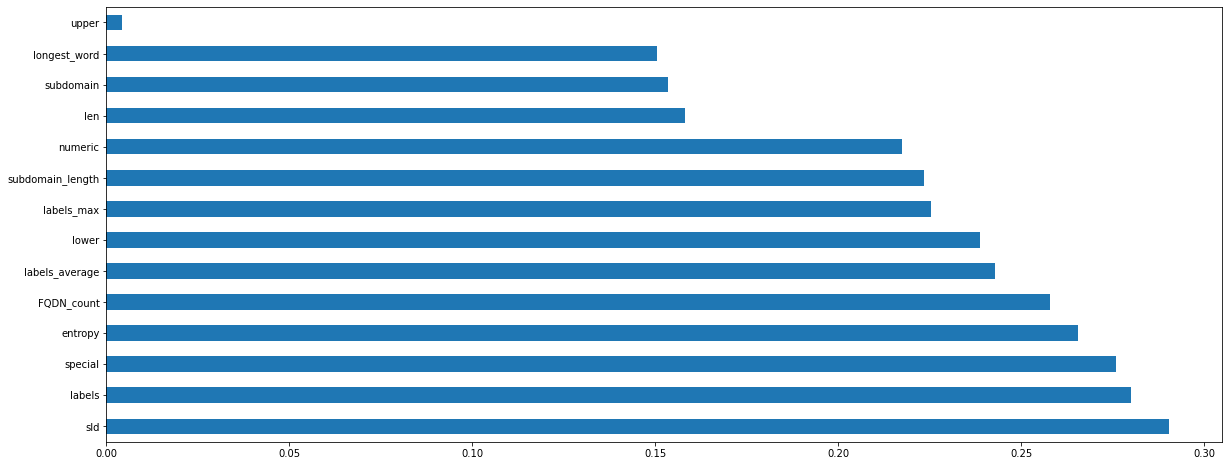

In [201]:
# Ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.barh(figsize=(20, 8))

In [202]:
# Selecting the  top important features
from sklearn.feature_selection import SelectKBest
sel_X_cols = SelectKBest(mutual_info_classif, k=9)

sel_X_cols.fit(train_X, train_Y)
train_X.columns[sel_X_cols.get_support()]

Index(['FQDN_count', 'subdomain_length', 'lower', 'entropy', 'special',
       'labels', 'labels_max', 'labels_average', 'sld'],
      dtype='object')

In [203]:
cols=['subdomain_length', 'lower', 'numeric', 'entropy', 'special', 'labels',
       'labels_max', 'labels_average', 'sld']

In [204]:
Features_1= X[cols]
print(Features_1.shape)

(268066, 9)


## Feature Selection-ANOVA F-Test

In [205]:
dependent_features=df.columns

In [206]:
df.columns

Index(['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
       'entropy', 'special', 'labels', 'labels_max', 'labels_average',
       'longest_word', 'sld', 'len', 'subdomain', 'Target Attack'],
      dtype='object')

Feature FQDN_count: 100295.623272
Feature subdomain_length: 104408.746142
Feature upper: 1187.011008
Feature lower: 20635.402116
Feature numeric: 120344.138041
Feature entropy: 3147.409773
Feature special: 110157.171290
Feature labels: 103211.270764
Feature labels_max: 1961.395367
Feature labels_average: 1250.277649
Feature longest_word: 26231.496012
Feature sld: 95216.006542
Feature len: 5691.725435
Feature subdomain: 72618.415961


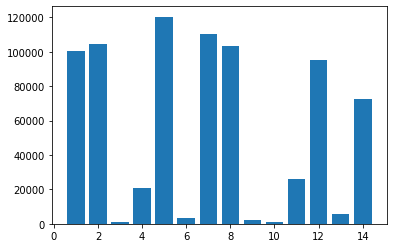

In [207]:


feature_selection = SelectKBest(score_func=f_classif, k='all')
feature_selection.fit(train_X, train_Y.values.ravel())


X_train_fs = feature_selection.transform(train_X)
X_test_fs = feature_selection.transform(test_X)

for i in range(len(feature_selection.scores_)):
    print('Feature %s: %f' % (dependent_features[i], feature_selection.scores_[i]))
# plot the scores
plt.bar([i+1 for i in range(len(feature_selection.scores_))], feature_selection.scores_)
plt.show()

## Name of Features with the order of Importance
1.  Feature FQDN_count: 104408.746142
2.  Feature lower: 120344.138042
3.  Feature entropy: 110157.171288 
4.  Feature special: 103211.270765
5.  Feature longest_word: 95216.006542
6.  Feature len: 72618.415961
7.  Feature labels_average: 26231.496012
8.  Feature upper: 20635.402116
9.  Feature sld: 5691.725435
10. Feature numeric: 3147.409773
11. Feature labels: 1961.395367
12. Feature subdomain_length: 1187.011008
13. Feature labels_max: 1250.277649

Now this shows us that Features FQDN_count, lower, entropy, special, longest_word, len, labels_average and upper are the important features.

As the importance value drops by around 15,000 we shall ignore features after feature#8





In [208]:
cols2=['FQDN_count', 'lower', 'entropy', 'special', 'longest_word', 'len',
       'labels_average', 'upper']

In [209]:
Features_2= X[cols2]
print(Features_2.shape)

(268066, 8)


In [210]:
y.value_counts()

Target Attack
1                147179
0                120887
dtype: int64

In [211]:
# Function for plotting confusion matrix
def plot_confmat(y,y_pred):
    confm = confusion_matrix(y, y_pred)
    ax= plt.subplot()
    sns.heatmap(confm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 

In [212]:
# Split into Train Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Features_1,y,test_size=0.30,random_state=42)

Accuracy:  0.8266724695349416
Precision:  0.7605967891642889
Recall:  0.9997514742098009


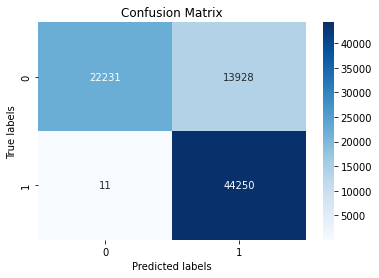

In [215]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
model_4=rfc.fit(X_train,y_train)
rfc_predict=model_4.predict(X_test)
print("Accuracy: ",accuracy_score(rfc_predict,y_test))
print("Precision: ",precision_score(y_test, rfc_predict))
print("Recall: ",recall_score(y_test, rfc_predict))
plot_confmat(y_test, rfc_predict)

from pickle import dump
dump(model_4, open('rfc_model.pkl', 'wb'))
# dump(scaler, open('scaler.pkl', 'wb'))

In [216]:
!pip install catboost
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=1000, depth=4, learning_rate=1)
model_5 = cat.fit(X_train,y_train)
cat_predict=model_5.predict(X_test)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0:	learn: 0.4175677	total: 129ms	remaining: 2m 8s
1:	learn: 0.4111780	total: 223ms	remaining: 1m 51s
2:	learn: 0.4078141	total: 330ms	remaining: 1m 49s
3:	learn: 0.4038410	total: 403ms	remaining: 1m 40s
4:	learn: 0.4028799	total: 505ms	remaining: 1m 40s
5:	learn: 0.4016599	total: 583ms	remaining: 1m 36s
6:	learn: 0.4014209	total: 665ms	remaining: 1m 34s
7:	learn: 0.4014408	total: 750ms	remaining: 1m 32s
8:	learn: 0.4013348	total: 789ms	remaining: 1m 26s
9:	learn: 0.4012299	total: 824ms	remaining: 1m 21s
10:	learn: 0.4011870	total: 907ms	remaining: 1m 21s
11:	learn: 0.4011289	total: 1.02s	remaining: 1m 24s
12:	learn: 0.4009839	total: 1.12s	remaining: 1m 24s
13:	learn: 0.4006270	total: 1.2s	remaining: 1m 24s
14:	learn: 0.4005963	total: 1.29s	remaining: 1m 24s
15:	learn: 0.4003524	total: 1.4s	remaining: 1m 26s
16:	learn: 0.4002538	total: 1.51s	remaining: 1m 27s
17:	learn: 0.4002478	total: 1.

KeyboardInterrupt: ignored

In [217]:
print("Accuracy: ", accuracy_score(y_test, cat_predict))
print("Precision: ",precision_score(y_test, cat_predict))
print("Recall: ",recall_score(y_test, cat_predict))

Accuracy:  0.8266476000994778
Precision:  0.7605885588558856
Recall:  0.999706287702492


In [ ]:
plot_confmat(y_test, cat_predict)

In [ ]:
# Model with Annova F Test

In [219]:
# Split into Train Test
Features_3=['labels','labels_average','labels_max','len','numeric','special','subdomain','subdomain_length']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Features_2,y,test_size=0.33,random_state=42)

ValueError: ignored

Accuracy:  0.8256577191952612
Precision:  0.7590392561983471
Recall:  0.999854199066874


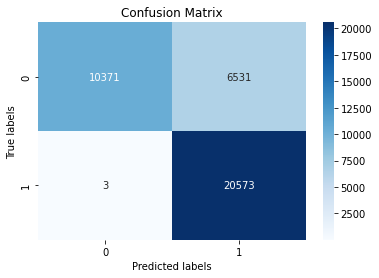

In [167]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
model_4=rfc.fit(X_train,y_train)
rfc_predict=model_4.predict(X_test)
print("Accuracy: ",accuracy_score(rfc_predict,y_test))
print("Precision: ",precision_score(y_test, rfc_predict))
print("Recall: ",recall_score(y_test, rfc_predict))
plot_confmat(y_test, rfc_predict)

dump(model_4, open('rf_model_f2.pkl', 'wb'))

# from pickle import dump
# dump(model_4, open('rfc_model.pkl', 'wb'))
# dump(scaler, open('scaler.pkl', 'wb'))

In [111]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=1000, depth=4, learning_rate=1)
model_5 = cat.fit(X_train,y_train)
cat_predict=model_5.predict(X_test)


0:	learn: 0.4189556	total: 18.7ms	remaining: 18.7s
1:	learn: 0.4086251	total: 58.4ms	remaining: 29.2s
2:	learn: 0.4073887	total: 110ms	remaining: 36.7s
3:	learn: 0.4054978	total: 147ms	remaining: 36.7s
4:	learn: 0.4037673	total: 185ms	remaining: 36.9s
5:	learn: 0.4031321	total: 234ms	remaining: 38.8s
6:	learn: 0.4029935	total: 266ms	remaining: 37.8s
7:	learn: 0.4028739	total: 297ms	remaining: 36.8s
8:	learn: 0.4025092	total: 336ms	remaining: 37s
9:	learn: 0.4024511	total: 377ms	remaining: 37.4s
10:	learn: 0.4024130	total: 408ms	remaining: 36.7s
11:	learn: 0.4023337	total: 454ms	remaining: 37.4s
12:	learn: 0.4022570	total: 488ms	remaining: 37s
13:	learn: 0.4022023	total: 535ms	remaining: 37.6s
14:	learn: 0.4019007	total: 568ms	remaining: 37.3s
15:	learn: 0.4018386	total: 601ms	remaining: 37s
16:	learn: 0.4012332	total: 638ms	remaining: 36.9s
17:	learn: 0.4011846	total: 673ms	remaining: 36.7s
18:	learn: 0.4011719	total: 714ms	remaining: 36.8s
19:	learn: 0.4010600	total: 766ms	remaining: 

In [112]:
print("Accuracy: ", accuracy_score(y_test, cat_predict))
print("Precision: ",precision_score(y_test, cat_predict))
print("Recall: ",recall_score(y_test, cat_predict))


Accuracy:  0.8255509899140829
Precision:  0.7590419250073812
Recall:  0.9995625972006221


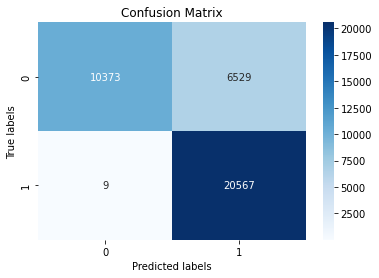

In [113]:
plot_confmat(y_test, cat_predict)

Streaming output truncated to the last 5000 lines.
253:	learn: 0.4000541	total: 2.47s	remaining: 933ms
254:	learn: 0.4000552	total: 2.48s	remaining: 922ms
255:	learn: 0.4000638	total: 2.48s	remaining: 913ms
256:	learn: 0.4000632	total: 2.49s	remaining: 902ms
257:	learn: 0.4000597	total: 2.5s	remaining: 892ms
258:	learn: 0.4000572	total: 2.51s	remaining: 882ms
259:	learn: 0.4000629	total: 2.52s	remaining: 871ms
260:	learn: 0.4000495	total: 2.53s	remaining: 862ms
261:	learn: 0.4000446	total: 2.53s	remaining: 851ms
262:	learn: 0.4000512	total: 2.55s	remaining: 843ms
263:	learn: 0.4000492	total: 2.56s	remaining: 835ms
264:	learn: 0.4000492	total: 2.57s	remaining: 825ms
265:	learn: 0.4000475	total: 2.58s	remaining: 814ms
266:	learn: 0.4000424	total: 2.59s	remaining: 804ms
267:	learn: 0.4000467	total: 2.59s	remaining: 794ms
268:	learn: 0.4000455	total: 2.6s	remaining: 784ms
269:	learn: 0.4000449	total: 2.61s	remaining: 774ms
270:	learn: 0.4000460	total: 2.62s	remaining: 763ms
271:	learn: 0.4

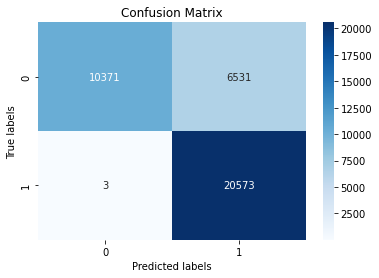

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Features_2,y,test_size=0.33,random_state=42)
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
# iterations=1000, depth=4, learning_rate=1
parameters={'max_depth':[3,5,6],'learning_rate':[0.2,0.4,0.6],'iterations': [80,150,350]}
# model_5 = cat.fit(X_train,y_train)
gs=GridSearchCV(cat,parameters,scoring='f1')
gs.fit(X_train, y_train)
cat_pred_gs=gs.predict(X_test)
print("Accuracy: ",accuracy_score(cat_pred_gs,y_test))
print("Precision: ",precision_score(y_test, cat_pred_gs))
print("Recall: ",recall_score(y_test, cat_pred_gs))
plot_confmat(y_test, cat_pred_gs)

In [160]:
from pickle import dump
print(gs.best_params_)
estimator = gs.best_estimator_
dump(estimator, open('cat_boost_model_f2.pkl', 'wb'))

{'iterations': 350, 'learning_rate': 0.4, 'max_depth': 5}


In [156]:
print(Features_1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [161]:
display(Features_2.columns)

Index(['FQDN_count', 'lower', 'entropy', 'special', 'longest_word', 'len',
       'labels_average', 'upper'],
      dtype='object')

In [ ]:
0,2,5,8,9,12,14,15

Accuracy:  0.8255776722343775
Precision:  0.7590508174336642
Recall:  0.999611197511664
{'max_depth': 60, 'max_features': 'auto', 'n_estimators': 200}


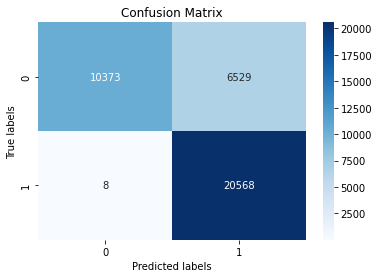

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Features_2,y,test_size=0.33,random_state=42)
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
# iterations=1000, depth=4, learning_rate=1
parameters={'max_depth': [40,60,80],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200,400,600]}
# model_5 = cat.fit(X_train,y_train)
rf_gs=GridSearchCV(rfc,parameters,scoring='f1')
rf_gs.fit(X_train, y_train)
rf_pred_gs=rf_gs.predict(X_test)
print("Accuracy: ",accuracy_score(rf_pred_gs,y_test))
print("Precision: ",precision_score(y_test, rf_pred_gs))
print("Recall: ",recall_score(y_test, rf_pred_gs))
plot_confmat(y_test, rf_pred_gs)

from pickle import dump
print(rf_gs.best_params_)
rf_model = rf_gs.best_estimator_
dump(rf_model, open('rf_model_f2.pkl', 'wb'))
